<ipython-input-14-b6062a4649c4>:81: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


8192 {'000101': 119, '111111': 131, '100111': 131, '100110': 119, '100010': 152, '110101': 132, '101111': 116, '110010': 143, '001011': 127, '110000': 130, '010000': 148, '000000': 148, '001101': 119, '001000': 141, '000001': 125, '011111': 129, '011101': 122, '100101': 124, '000010': 128, '010010': 118, '001100': 135, '100001': 136, '101110': 130, '100000': 122, '001110': 144, '110100': 125, '010100': 132, '101000': 153, '111110': 129, '010011': 117, '000111': 120, '110011': 128, '000110': 121, '001111': 130, '110001': 121, '110111': 129, '101001': 135, '010001': 121, '011001': 135, '011000': 134, '110110': 127, '111010': 123, '011011': 111, '100100': 133, '111101': 145, '011110': 111, '111001': 120, '011100': 145, '111011': 150, '111100': 135, '001001': 117, '010101': 104, '000100': 137, '010111': 106, '101101': 117, '101010': 129, '010110': 103, '001010': 140, '101100': 92, '011010': 117, '111000': 140, '000011': 131, '100011': 130, '101011': 130}
Measurement results: {'000000': 1.8

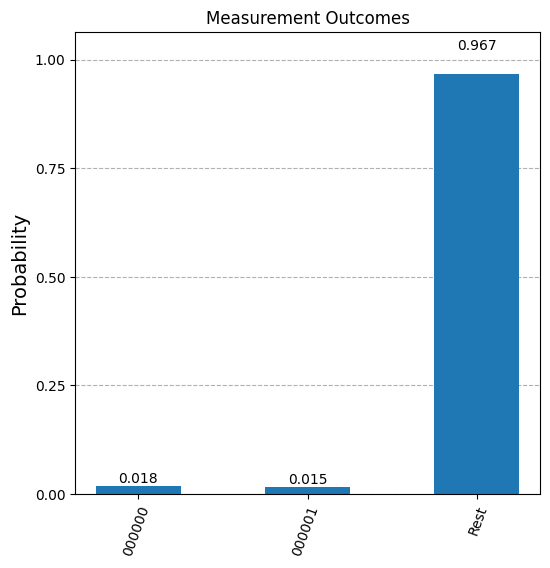

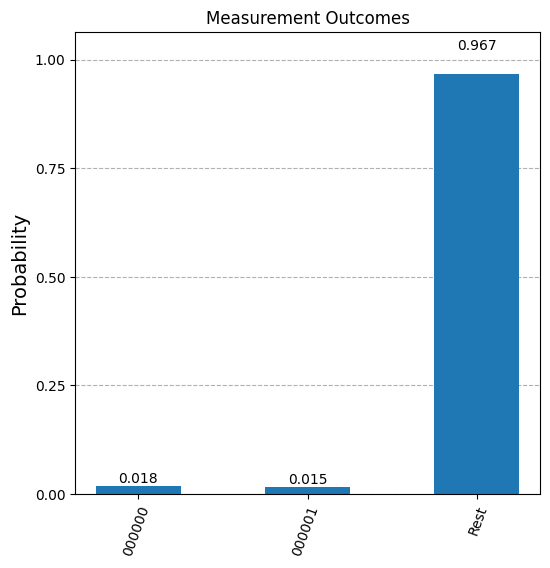

In [ ]:
# Install qiskit and qiskit-aer if you haven't already
!pip install qiskit qiskit-aer
!pip install qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib

# Import necessary modules
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator  # Use AerSimulator instead of Aer
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
# from qiskit_aer.noise import NoiseModel
# from qiskit_aer.noise.errors import pauli_error, depolarizing_error
from qiskit.visualization import plot_histogram
from qiskit.visualization import visualize_transition
import matplotlib.pyplot as plt  # Import matplotlib
from IPython.display import display

n_qubits = 6
qc = QuantumCircuit(n_qubits)
qc.h(range(n_qubits))  # Apply Hadamard gates to create superposition
qc.h(0);

giter = 4; # number of Grover iterations

for _ in range(giter):
  marked_state = '000000'
  # Oracle: Mark the desired state by flipping its phase
  # Flip the bits of the marked state (e.g., '11' becomes '00')
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Apply multi-controlled Z gate (MCZ) using mcx
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit

  # Flip the bits back to the original state
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  marked_state = '000001'
  # Oracle: Mark the desired state by flipping its phase
  # Flip the bits of the marked state (e.g., '11' becomes '00')
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Apply multi-controlled Z gate (MCZ) using mcx
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit

  # Flip the bits back to the original state
  for i, bit in enumerate(reversed(marked_state)):
      if bit == '0':
          qc.x(i)  # Apply X gate to qubits where the marked state has '0'

  # Diffusion operator: Amplitude amplification
  qc.h(range(n_qubits))  # Apply H gates to all qubits
  qc.x(range(n_qubits))  # Apply X gates to all qubits
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.mcx(list(range(n_qubits - 1)), n_qubits - 1)  # Multi-controlled X gate
  qc.h(n_qubits - 1)  # Apply H gate to the last qubit
  qc.x(range(n_qubits))  # Apply X gates to all qubits
  qc.h(range(n_qubits))  # Apply H gates to all qubits

qc.measure_all()  # Measure all qubits

# Simulate the circuit using AerSimulator
# job = simulator.run(qc, shots=100000)  # Run the circuit with 1000 shots

# Save an IBM Cloud account.
# QiskitRuntimeService.save_account(channel="ibm_cloud", token="MY_IBM_CLOUD_API_KEY", instance="MY_IBM_CLOUD_CRN")

# Save an IBM Quantum account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="3eee63c33a5e7e997cb6b1e465591fb769364df74ffded15c50d436d1f7cec75a258dbef3ecbefa2beea33d1d2c6117289235353170094f84acd5bf2bfea7842", overwrite=True)

service = QiskitRuntimeService()

# Specify a QPU to use for the noise model
real_backend = service.backend("ibm_brisbane")

# Create a noise model for the real backend
aer = AerSimulator.from_backend(real_backend)

# Run the sampler job locally using AerSimulator.
pm = generate_preset_pass_manager(backend=aer, optimization_level=1)
isa_qc = pm.run(qc)
sampler = Sampler(mode=aer)
sampler.options.default_shots = 8192
result = sampler.run([isa_qc]).result()

# Grab results from the job
# job = simulator.run(qc_t, shots=100000)
# result = job.result()
counts = result[0].data.meas.get_counts()
total_counts = sum(counts.values())
print(total_counts, counts)
percentages = {state: (count / total_counts) * 100 for state, count in counts.items()}
states = list(percentages.keys())
states.sort()
sstates = {i: percentages[i] for i in states}

# Visualize the results
print("Measurement results:", sstates)
rest = 100-sstates['000000']-sstates['000001']
outvalues = {"000000": sstates['000000'], "000001": sstates['000001'], "Rest": rest}
fig, ax=plt.subplots(figsize=(6, 6))
plot_histogram(outvalues, title="Measurement Outcomes", ax=ax)

ax.set_ylabel("Probability")
display(plt.gcf())